In [1]:
import starry
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

/Users/mcantiello/opt/anaconda3/envs/new_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
starry.config.lazy = False
starry.config.quiet = True

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


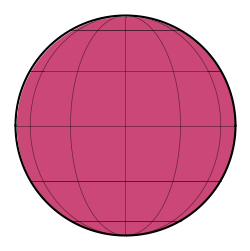

In [3]:
map0 = starry.Map(ydeg=1)
map0.show()

In [8]:
contrast = -0.25
radius = 20
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius)

In [9]:
map.show(theta=np.linspace(0, 360, 50))

In [ ]:
## Setup 

In [10]:
## Setup Star
star = starry.Primary(starry.Map(ydeg=0, udeg=2, amp=1.0), m=1.0, r=1.0)
## Add Limb Darkening
star.map[1] = 0.40
star.map[2] = 0.26

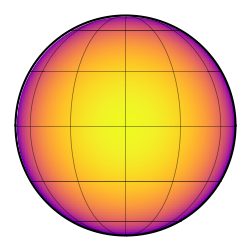

In [11]:
star.map.show()

In [19]:
map.spot(contrast=-0.001,radius = 20)

In [20]:
map.show(theta=np.linspace(0, 360, 50))

In [21]:
# Set One Bright Spot
contrast = -0.001
radius = 20
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius)

In [22]:
map.show(theta=np.linspace(0, 360, 50))

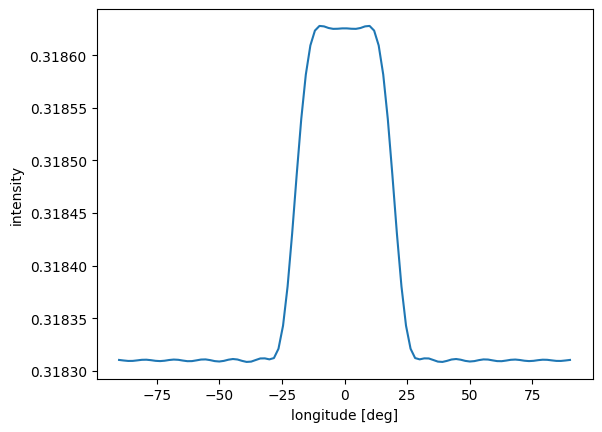

In [23]:
lon = np.linspace(-90, 90, 100)
plt.plot(lon, map.intensity(lon=lon))
plt.xlabel("longitude [deg]")
plt.ylabel("intensity");

## Radial Velocity Map 

In [146]:
map = starry.Map(udeg=2,ydeg=30,rv=True)

In [187]:
## Setting up HR 7495
map.inc = 21
map.obl = 30
map.veq = 113000 # m/s (113 km/s)
map.alpha = 0.0 # shear

In [188]:
## Limb Darkening
map[1] = 0.5
map[2] = 0.25

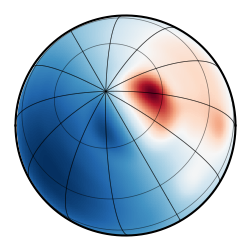

In [189]:
map.show(rv=True)

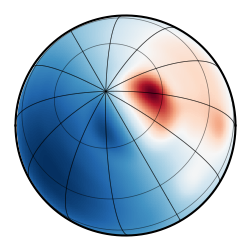

In [190]:
map.show()

In [191]:
map.show(theta=np.linspace(0, 360, 50))

In [192]:
#map.spot(contrast=-0.25,radius = 20)

In [193]:
# Set One Bright Spot
map.spot(contrast=-0.3, radius=10,lat=70, lon=70)
map.spot(contrast=-0.3, radius=10,lat=20, lon=10)

map.spot(contrast=-0.1, radius=5,lat=0, lon=0)
map.spot(contrast=-0.1, radius=20,lat=25, lon=45)
map.spot(contrast=-0.1, radius=30,lat=50, lon=75)
map.spot(contrast=-0.1, radius=30,lat=80, lon=200)

In [194]:
map.show(theta=np.linspace(0, 360, 50),rv=False)

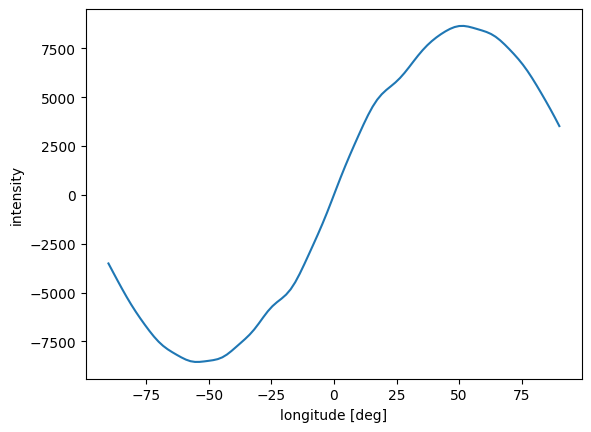

In [195]:
lon = np.linspace(-90, 90, 100)
plt.plot(lon, map.intensity(lon=lon))
plt.xlabel("longitude [deg]")
plt.ylabel("intensity");

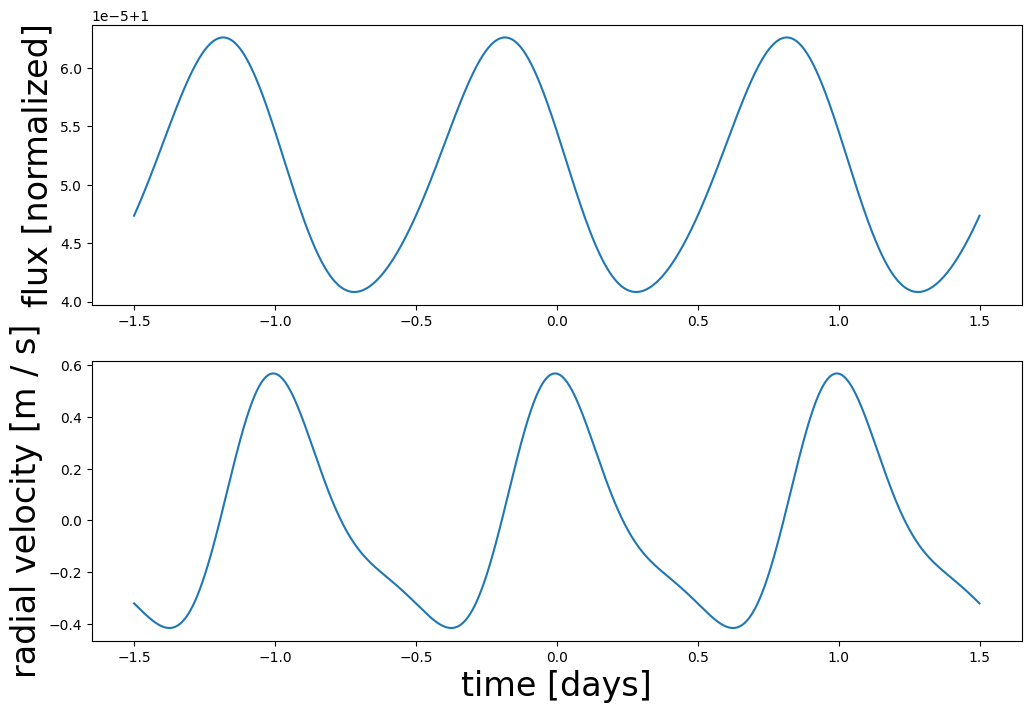

In [218]:
import astropy.units as u
import sys

# Create a Starry System

A = starry.Primary(
    map = starry.Map(udeg=2,ydeg=30,rv=True),
    r=3.3,
    m=1.7,
    length_unit=u.Rsun,
    mass_unit=u.Msun,
)

A.map.inc = 21
A.map.obl = 30
A.map.veq = 113000 # m/s (113 km/s)
A.map.alpha = 0.0 # shear
A.map[1] = 0.5
A.map[2] = 0.25
#A.map.spot(contrast=-0.0001, radius=20,lat=70, lon=70)
A.map.spot(contrast=-0.0001, radius=10,lat=20, lon=10)
A.map.spot(contrast=-0.0001, radius=5,lat=0, lon=0)
A.map.spot(contrast=-0.0001, radius=20,lat=25, lon=45)
A.map.spot(contrast=-0.0001, radius=30,lat=50, lon=75)
A.map.spot(contrast=-0.0001, radius=30,lat=80, lon=200)


# Define the planet
b = starry.Secondary(
    starry.Map(rv=True, amp=0, veq=0),
    r=0.00000001,
    porb=100000.0,
    m=0.000000001,
    t0=0.0,
    inc=80.0,
    ecc=0.3,
    w=60,
    length_unit=u.Rsun,
    mass_unit=u.Msun,
    angle_unit=u.degree,
    time_unit=u.day,
)

sys = starry.System(A,b)

# Compute the flux & RV signal
time = np.linspace(-1.5, 1.5, 2000)
flux = sys.flux(time)
rv = sys.rv(time)

# Plot it
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(time, flux)
ax[1].plot(time, rv)
ax[1].set_xlabel("time [days]", fontsize=24)
ax[0].set_ylabel("flux [normalized]", fontsize=24)
ax[1].set_ylabel("radial velocity [m / s]", fontsize=24);

In [155]:
import numpy as np
import starry
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
import matplotlib.pyplot as plt
from corner import corner

starry.config.quiet = True

In [156]:
# True values
truth = dict(contrast=-0.01, radius=10, lat=60, lon=30)

In [157]:
# Things we'll assume are known (HR7495)
inc = 21.0
P = 1.447 # d (spike period)

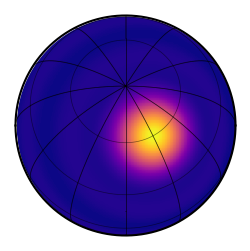

In [158]:
map = starry.Map(ydeg=10, udeg=2, rv=True)
map.inc = inc
map.spot(
    contrast=truth["contrast"],
    radius=truth["radius"],
    lat=truth["lat"],
    lon=truth["lon"],
)

map.show(rv=False)

# Add Some Limb Darkening
map[1] = 0.5
map[2] = 0.25

In [159]:
map.inc = 21
map.obl = 0
map.veq = 113000
#map.alpha = 0.3
map[1] = 0.5
map[2] = 0.25

In [160]:
map.show(rv=True, theta=np.linspace(0, 360, 50))

In [161]:
# Generate Synthetic Light Curve with some noise
t = np.linspace(0, 3.0, 500)
flux0 = map.flux(theta=360.0 / P * t)
np.random.seed(0)
flux_err = 2e-5
flux = flux0 + flux_err * np.random.randn(len(t))

# Compute the  RV signal

t = np.linspace(0, 3.0, 500)
rv0 = map.rv(theta=360.0 / P * t)
np.random.seed(0)
rv_err = 2e-22
rv = rv0 + rv_err * np.random.randn(len(t))


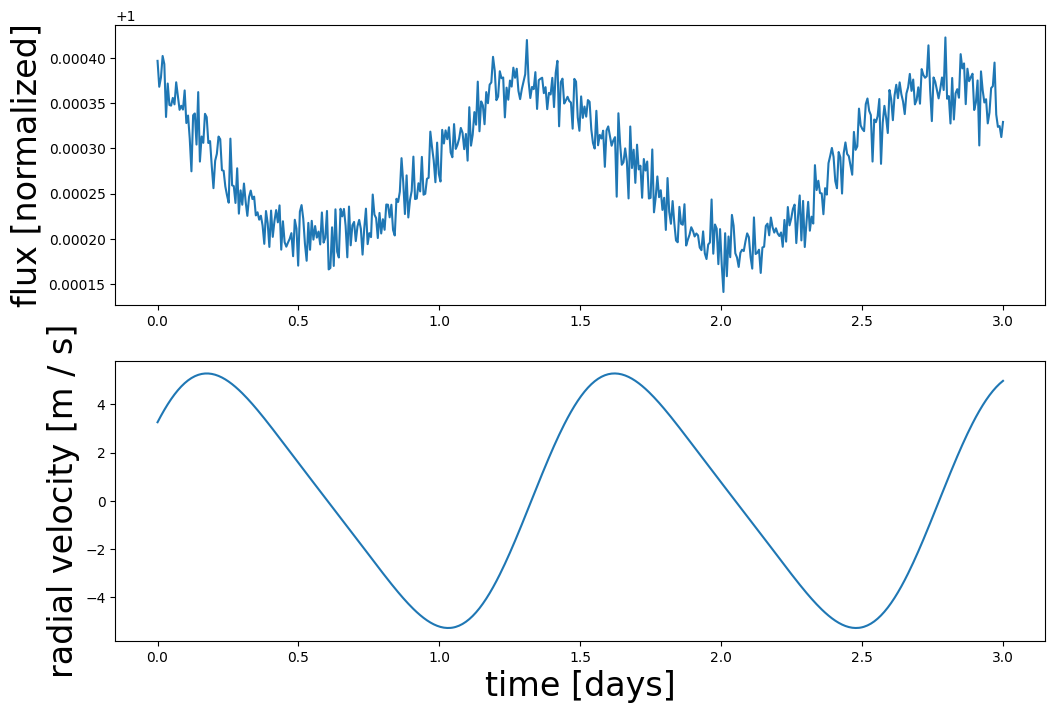

In [162]:
# Plot it
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(t, flux)
ax[1].plot(t, rv)
ax[1].set_xlabel("time [days]", fontsize=24)
ax[0].set_ylabel("flux [normalized]", fontsize=24)
ax[1].set_ylabel("radial velocity [m / s]", fontsize=24);

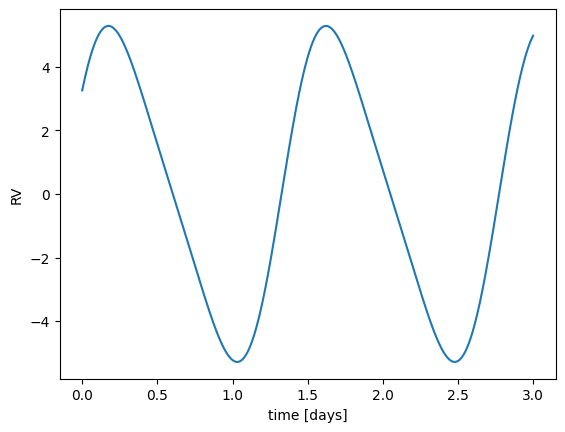

In [145]:
# Compute the flux & RV signal



t = np.linspace(0, 3.0, 500)
rv0 = map.rv(theta=360.0 / P * t)
np.random.seed(0)
rv_err = 2e-22
rv = rv0 + rv_err * np.random.randn(len(t))

plt.plot(t, rv0)
plt.xlabel("time [days]")
plt.ylabel("RV");




In [146]:
# Plot the flux
plt.figure(figsize=(12, 5))
plt.plot(xo, map.flux(xo=xo, yo=yo, ro=ro))
plt.xlabel("Occultor x position [stellar radii]", fontsize=24)
plt.ylabel("Flux [normalized]", fontsize=24)

# Plot the radial velocity
plt.figure(figsize=(12, 5))
plt.plot(xo, map.rv(xo=xo, yo=yo, ro=ro))
plt.xlabel("Occultor x position [stellar radii]", fontsize=24)
plt.ylabel("Radial velocity [m/s]", fontsize=24);

NameError: name 'yo' is not defined

<Figure size 1200x500 with 0 Axes>

In [ ]:
theta = np.linspace(-180, 180, 1000)

# Plot the flux
plt.figure(figsize=(12, 5))
plt.plot(theta, map.flux(theta=theta))
plt.xlabel("Angle of rotation [degrees]", fontsize=24)
plt.ylabel("Flux [normalized]", fontsize=24)

# Plot the radial velocity
plt.figure(figsize=(12, 5))
plt.plot(theta, map.rv(theta=theta))
plt.xlabel("Angle of rotation [degrees]", fontsize=24)
plt.ylabel("Radial velocity [m/s]", fontsize=24);

# Dark Spot

In [148]:
# True values
truth = dict(contrast=+0.01, radius=10, lat=60, lon=30)
# Things we'll assume are known (HR7495)
inc = 21.0
P = 1.447 # d (spike period)

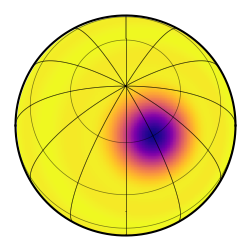

In [149]:
map = starry.Map(ydeg=10, udeg=2, rv=True)
map.inc = inc
map.spot(
    contrast=truth["contrast"],
    radius=truth["radius"],
    lat=truth["lat"],
    lon=truth["lon"],
)

map.show(rv=False)

# Add Some Limb Darkening
map[1] = 0.5
map[2] = 0.25

In [150]:
map.inc = 21
map.obl = 0
map.veq = 113000
#map.alpha = 0.3
map[1] = 0.5
map[2] = 0.25

map.show(rv=True, theta=np.linspace(0, 360, 50))

In [152]:
# Generate Synthetic Light Curve with some noise
t = np.linspace(0, 3.0, 500)
flux0 = map.flux(theta=360.0 / P * t)
np.random.seed(0)
flux_err = 2e-5
flux = flux0 + flux_err * np.random.randn(len(t))

# Compute the  RV signal

t = np.linspace(0, 3.0, 500)
rv0 = map.rv(theta=360.0 / P * t)
np.random.seed(0)
rv_err = 2e-22
rv = rv0 + rv_err * np.random.randn(len(t))




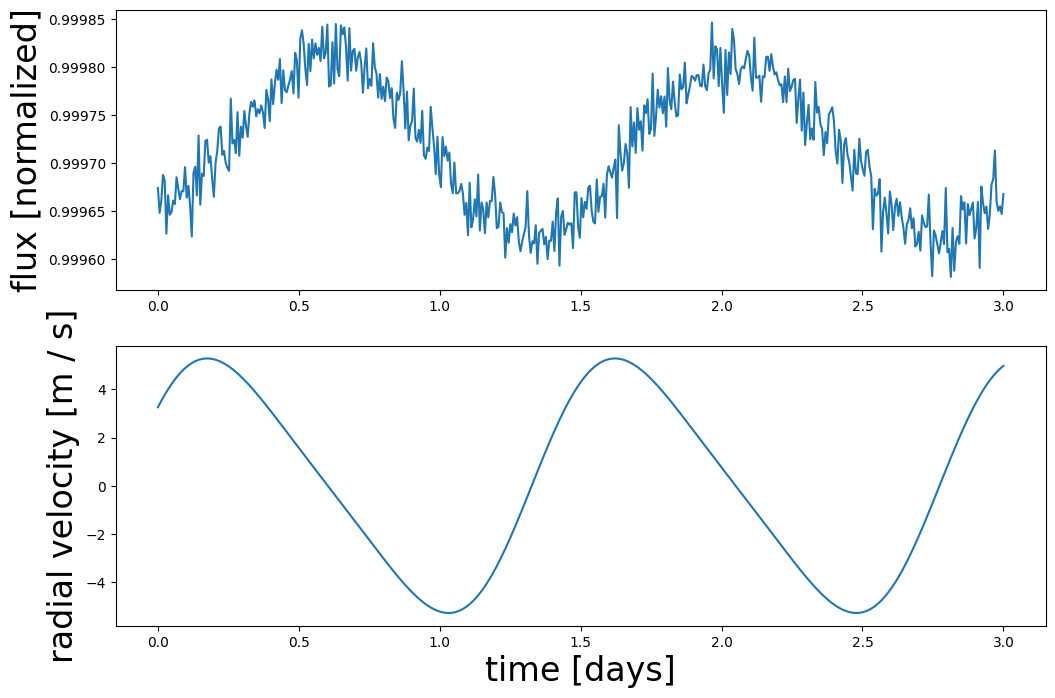

In [154]:
# Plot it
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(t, flux)
ax[1].plot(t, rv)
ax[1].set_xlabel("time [days]", fontsize=24)
ax[0].set_ylabel("flux [normalized]", fontsize=24)
ax[1].set_ylabel("radial velocity [m / s]", fontsize=24);

